In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

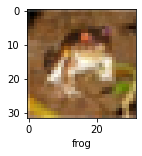

In [10]:
plot_sample(X_train, y_train, 0)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 82s 52ms/step - loss: 1.8107 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.6243 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5419 - accuracy: 0.4547
Epoch 4/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.4825 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4329 - accuracy: 0.4973


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.38      0.49      1000
           1       0.73      0.37      0.49      1000
           2       0.46      0.23      0.30      1000
           3       0.35      0.44      0.39      1000
           4       0.32      0.57      0.41      1000
           5       0.45      0.28      0.34      1000
           6       0.56      0.48      0.52      1000
           7       0.46      0.63      0.53      1000
           8       0.53      0.71      0.61      1000
           9       0.52      0.62      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000

